In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyam
import sklearn.decomposition
from scipy.optimize import fsolve, root, least_squares

<IPython.core.display.Javascript object>

In [2]:
version_str = "v4"
output_dir = f"../output/{version_str}/fair/"
date_str = "2022-02-14"
temps = pd.read_csv("{}fair_output_quantiles_{}_{}.csv".format(output_dir, date_str, version_str))
fair_df = pd.read_csv('{}fair_output_raw_{}_{}.csv'.format(output_dir, date_str, version_str), index_col=0)
fair_df

scenario      1765      1766  \
0      scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.002751  0.005241   
1      scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.003864  0.007122   
2      scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.015027  0.025776   
3      scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.003456  0.005529   
4      scen_2030fact0.12_nz2040_ov-10000_meth0.25  0.005983  0.010959   
...                                           ...       ...       ...   
21595       scen_2030fact1.32_nz2200_ov0_meth0.75 -0.002594 -0.003396   
21596       scen_2030fact1.32_nz2200_ov0_meth0.75  0.002257  0.004585   
21597       scen_2030fact1.32_nz2200_ov0_meth0.75  0.005314  0.009809   
21598       scen_2030fact1.32_nz2200_ov0_meth0.75  0.001698  0.003474   
21599       scen_2030fact1.32_nz2200_ov0_meth0.75  0.006096  0.011216   

           1767      1768      1769      1770      1771      1772      1773  \
0      0.007940  0.012981  0.018950  0.025513  0.029475  0.030094  0.030464   
1      0.010898  0.020395  0.031454  0.043210  0.047838  0.043892  0.041129   
2      0.035114  0.046443  0.057942  0.069351  0.076312  0.077298  0.078463   
3      0.007669  0.012386  0.017598  0.022956  0.024841  0.023868  0.022721   
4      0.015759  0.022375  0.029606  0.037201  0.042308  0.042533  0.043916   
...         ...       ...       ...       ...       ...       ...       ...   
21595 -0.002763  0.003357  0.011730  0.021526  0.026191  0.026982  0.025351   
21596  0.007460  0.014016  0.022098  0.031179  0.036468  0.038749  0.039038   
21597  0.014304  0.021737  0.030238  0.039397  0.044933  0.045437  0.045969   
21598  0.005696  0.010695  0.016892  0.023899  0.028145  0.029651  0.030138   
21599  0.016274  0.023868  0.032381  0.041457  0.047317  0.047694  0.048879   

       ...      2291      2292      2293      2294      2295      2296  \
0      ...  0.312867  0.310305  0.307748  0.305196  0.302648  0.300105   
1      ...  0.325923  0.322226  0.318540  0.314863  0.311197  0.307541   
2      ...  0.404382  0.401322  0.398268  0.395220  0.392179  0.389145   
3      ...  0.401651  0.398589  0.395533  0.392484  0.389440  0.386403   
4      ...  0.276379  0.274497  0.272622  0.270754  0.268893  0.267039   
...    ...       ...       ...       ...       ...       ...       ...   
21595  ...  3.112862  3.112999  3.113137  3.113277  3.113418  3.113560   
21596  ...  4.182481  4.183843  4.185191  4.186524  4.187842  4.189147   
21597  ...  5.413546  5.415801  5.418031  5.420236  5.422417  5.424574   
21598  ...  4.212919  4.216539  4.220138  4.223716  4.227274  4.230811   
21599  ...  2.976915  2.978321  2.979723  2.981121  2.982514  2.983903   

           2297      2298      2299      2300  
0      0.297567  0.295033  0.292504  0.289980  
1      0.303895  0.300260  0.296635  0.293022  
2      0.386117  0.383095  0.380081  0.377073  
3      0.383372  0.380348  0.377330  0.374319  
4      0.265191  0.263351  0.261517  0.259691  
...         ...       ...       ...       ...  
21595  3.113704  3.113849  3.113995  3.114143  
21596  4.190437  4.191713  4.192976  4.194225  
21597  5.426707  5.428816  5.430902  5.432965  
21598  4.234328  4.237825  4.241301  4.244757  
21599  2.985287  2.986667  2.988043  2.989414  

[21600 rows x 537 columns]

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.plotting - INFO: >=13 labels, not applying legend


<AxesSubplot:title={'center':'model: NameVanished - region: World - variable: Surface Temperature - climate_model: FaIRv1.6.4 - quantile: 0.5'}, xlabel='Year', ylabel='K'>

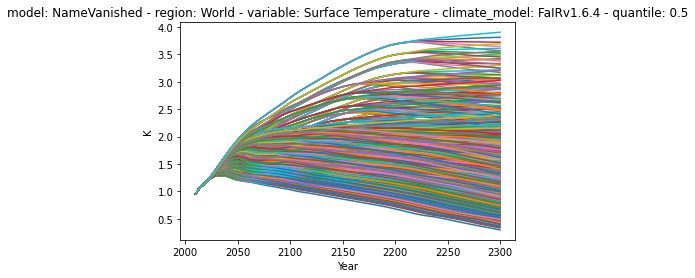

In [3]:
temps_py = pyam.IamDataFrame(temps)
temps_py.filter(quantile=0.5).plot()

In [4]:
temps_round = temps.copy()
round_val = 0.05
times = np.arange(2010, 2301)
for col in times:
    if str(col) in temps_round.columns:
        temps_round[str(col)] = (temps_round[str(col)] / round_val).round() * round_val
temps_round

climate_model         model region  \
0       FaIRv1.6.4  NameVanished  World   
1       FaIRv1.6.4  NameVanished  World   
2       FaIRv1.6.4  NameVanished  World   
3       FaIRv1.6.4  NameVanished  World   
4       FaIRv1.6.4  NameVanished  World   
...            ...           ...    ...   
4495    FaIRv1.6.4  NameVanished  World   
4496    FaIRv1.6.4  NameVanished  World   
4497    FaIRv1.6.4  NameVanished  World   
4498    FaIRv1.6.4  NameVanished  World   
4499    FaIRv1.6.4  NameVanished  World   

                                        scenario unit             variable  \
0     scen_2030fact0.12_nz2040_ov-10000_meth0.25    K  Surface Temperature   
1      scen_2030fact0.12_nz2040_ov-10000_meth0.5    K  Surface Temperature   
2     scen_2030fact0.12_nz2040_ov-10000_meth0.75    K  Surface Temperature   
3      scen_2030fact0.12_nz2040_ov-2500_meth0.25    K  Surface Temperature   
4       scen_2030fact0.12_nz2040_ov-2500_meth0.5    K  Surface Temperature   
...                                          ...  ...                  ...   
4495    scen_2030fact1.32_nz2200_ov-7500_meth0.5    K  Surface Temperature   
4496   scen_2030fact1.32_nz2200_ov-7500_meth0.75    K  Surface Temperature   
4497       scen_2030fact1.32_nz2200_ov0_meth0.25    K  Surface Temperature   
4498        scen_2030fact1.32_nz2200_ov0_meth0.5    K  Surface Temperature   
4499       scen_2030fact1.32_nz2200_ov0_meth0.75    K  Surface Temperature   

      quantile  2010  2011  2012  ...  2291  2292  2293  2294  2295  2296  \
0          0.1  0.95  0.95  0.95  ...  0.15  0.15  0.15  0.15  0.15  0.15   
1          0.1  0.95  0.95  0.95  ...  0.20  0.20  0.20  0.20  0.20  0.20   
2          0.1  0.95  0.95  0.95  ...  0.25  0.25  0.25  0.25  0.25  0.25   
3          0.1  0.95  0.95  0.95  ...  0.80  0.80  0.80  0.80  0.80  0.80   
4          0.1  0.95  0.95  0.95  ...  0.85  0.85  0.85  0.85  0.85  0.85   
...        ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   
4495       0.9  1.00  1.05  1.05  ...  4.15  4.15  4.15  4.15  4.15  4.15   
4496       0.9  1.00  1.05  1.05  ...  4.35  4.35  4.35  4.35  4.35  4.35   
4497       0.9  1.00  1.05  1.05  ...  4.25  4.25  4.25  4.25  4.25  4.30   
4498       0.9  1.00  1.05  1.05  ...  4.40  4.40  4.40  4.40  4.40  4.40   
4499       0.9  1.00  1.05  1.05  ...  4.55  4.60  4.60  4.60  4.60  4.60   

      2297  2298  2299  2300  
0     0.15  0.15  0.15  0.15  
1     0.20  0.20  0.20  0.20  
2     0.20  0.20  0.20  0.20  
3     0.80  0.80  0.80  0.80  
4     0.85  0.85  0.85  0.85  
...    ...   ...   ...   ...  
4495  4.15  4.15  4.15  4.15  
4496  4.35  4.35  4.35  4.35  
4497  4.30  4.30  4.30  4.30  
4498  4.40  4.40  4.40  4.40  
4499  4.60  4.60  4.60  4.60  

[4500 rows x 298 columns]

In [5]:
relevant_quant = 0.5
temp_inv = temps_round.loc[[i == relevant_quant for i in temps_round["quantile"]], temps_round.columns[7:].values]
temp_inv

2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  ...  2291  \
1800  0.95   1.0   1.0  1.05  1.05   1.1   1.1   1.1  1.15  1.15  ...  0.35   
1801  0.95   1.0   1.0  1.05  1.05   1.1   1.1   1.1  1.15  1.15  ...  0.40   
1802  0.95   1.0   1.0  1.05  1.05   1.1   1.1   1.1  1.15  1.15  ...  0.45   
1803  0.95   1.0   1.0  1.05  1.05   1.1   1.1   1.1  1.15  1.15  ...  1.05   
1804  0.95   1.0   1.0  1.05  1.05   1.1   1.1   1.1  1.15  1.15  ...  1.15   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
2695  0.95   1.0   1.0  1.05  1.05   1.1   1.1   1.1  1.15  1.15  ...  3.45   
2696  0.95   1.0   1.0  1.05  1.05   1.1   1.1   1.1  1.15  1.15  ...  3.65   
2697  0.95   1.0   1.0  1.05  1.05   1.1   1.1   1.1  1.15  1.15  ...  3.55   
2698  0.95   1.0   1.0  1.05  1.05   1.1   1.1   1.1  1.15  1.15  ...  3.70   
2699  0.95   1.0   1.0  1.05  1.05   1.1   1.1   1.1  1.15  1.15  ...  3.90   

      2292  2293  2294  2295  2296  2297  2298  2299  2300  
1800  0.35  0.30  0.30  0.30  0.30  0.30  0.30  0.30  0.30  
1801  0.40  0.40  0.40  0.40  0.40  0.40  0.40  0.35  0.35  
1802  0.45  0.45  0.45  0.45  0.40  0.40  0.40  0.40  0.40  
1803  1.05  1.05  1.05  1.05  1.05  1.05  1.05  1.05  1.05  
1804  1.15  1.15  1.15  1.15  1.15  1.15  1.15  1.15  1.15  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
2695  3.45  3.45  3.45  3.45  3.45  3.45  3.45  3.45  3.45  
2696  3.65  3.65  3.65  3.65  3.65  3.65  3.65  3.65  3.65  
2697  3.55  3.55  3.55  3.55  3.55  3.55  3.55  3.55  3.55  
2698  3.70  3.70  3.70  3.70  3.70  3.70  3.70  3.70  3.70  
2699  3.90  3.90  3.90  3.90  3.90  3.90  3.90  3.90  3.90  

[900 rows x 291 columns]

In [6]:
binned_temp = temp_inv.drop_duplicates()
binned_temp

2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  ...  2291  \
1800  0.95   1.0   1.0  1.05  1.05   1.1   1.1   1.1  1.15  1.15  ...  0.35   
1801  0.95   1.0   1.0  1.05  1.05   1.1   1.1   1.1  1.15  1.15  ...  0.40   
1802  0.95   1.0   1.0  1.05  1.05   1.1   1.1   1.1  1.15  1.15  ...  0.45   
1803  0.95   1.0   1.0  1.05  1.05   1.1   1.1   1.1  1.15  1.15  ...  1.05   
1804  0.95   1.0   1.0  1.05  1.05   1.1   1.1   1.1  1.15  1.15  ...  1.15   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
2695  0.95   1.0   1.0  1.05  1.05   1.1   1.1   1.1  1.15  1.15  ...  3.45   
2696  0.95   1.0   1.0  1.05  1.05   1.1   1.1   1.1  1.15  1.15  ...  3.65   
2697  0.95   1.0   1.0  1.05  1.05   1.1   1.1   1.1  1.15  1.15  ...  3.55   
2698  0.95   1.0   1.0  1.05  1.05   1.1   1.1   1.1  1.15  1.15  ...  3.70   
2699  0.95   1.0   1.0  1.05  1.05   1.1   1.1   1.1  1.15  1.15  ...  3.90   

      2292  2293  2294  2295  2296  2297  2298  2299  2300  
1800  0.35  0.30  0.30  0.30  0.30  0.30  0.30  0.30  0.30  
1801  0.40  0.40  0.40  0.40  0.40  0.40  0.40  0.35  0.35  
1802  0.45  0.45  0.45  0.45  0.40  0.40  0.40  0.40  0.40  
1803  1.05  1.05  1.05  1.05  1.05  1.05  1.05  1.05  1.05  
1804  1.15  1.15  1.15  1.15  1.15  1.15  1.15  1.15  1.15  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
2695  3.45  3.45  3.45  3.45  3.45  3.45  3.45  3.45  3.45  
2696  3.65  3.65  3.65  3.65  3.65  3.65  3.65  3.65  3.65  
2697  3.55  3.55  3.55  3.55  3.55  3.55  3.55  3.55  3.55  
2698  3.70  3.70  3.70  3.70  3.70  3.70  3.70  3.70  3.70  
2699  3.90  3.90  3.90  3.90  3.90  3.90  3.90  3.90  3.90  

[900 rows x 291 columns]

In [7]:
# reduction factor:
len(binned_temp) / len(temp_inv)

1.0

Conclusion: binning the data does not  reduce the number of pathways by a very substantial amount
## Try PCA

In [8]:
temps_90 = pyam.IamDataFrame(temps).filter(quantile=0.9).timeseries()
temps_50 = pyam.IamDataFrame(temps).filter(quantile=0.5).timeseries()
temps_10 = pyam.IamDataFrame(temps).filter(quantile=0.1).timeseries()
temps_90 = temps_90.reset_index(drop=True)
temps_50 = temps_50.reset_index(drop=True)
temps_10 = temps_10.reset_index(drop=True)

In [9]:
temps_10

2010      2011      2012      2013      2014      2015      2016  \
0    0.932584  0.949229  0.965410  0.982231  0.996941  1.005958  1.014679   
1    0.932539  0.949206  0.965461  0.982434  0.997389  1.007015  1.016305   
2    0.932460  0.949167  0.965550  0.982788  0.998173  1.008862  1.019068   
3    0.932584  0.949229  0.965410  0.982231  0.996941  1.005958  1.014679   
4    0.932539  0.949206  0.965461  0.982434  0.997389  1.007015  1.016305   
..        ...       ...       ...       ...       ...       ...       ...   
895  0.932539  0.949206  0.965461  0.982434  0.997389  1.007015  1.016305   
896  0.932460  0.949167  0.965550  0.982788  0.998173  1.008862  1.019068   
897  0.932584  0.949229  0.965410  0.982231  0.996941  1.005958  1.014679   
898  0.932539  0.949206  0.965461  0.982434  0.997389  1.007015  1.016305   
899  0.932460  0.949167  0.965550  0.982788  0.998173  1.008862  1.019068   

         2017      2018      2019  ...      2291      2292      2293  \
0    1.024605  1.035805  1.049330  ...  0.169997  0.166608  0.163233   
1    1.026918  1.038919  1.053353  ...  0.217677  0.214607  0.211549   
2    1.030615  1.043493  1.058705  ...  0.240569  0.237498  0.234438   
3    1.024605  1.035805  1.049330  ...  0.789249  0.788406  0.787563   
4    1.026918  1.038919  1.053353  ...  0.838614  0.837793  0.836974   
..        ...       ...       ...  ...       ...       ...       ...   
895  1.026918  1.038919  1.053353  ...  2.554180  2.552705  2.551227   
896  1.030615  1.043493  1.058705  ...  2.691011  2.689656  2.688296   
897  1.024605  1.035805  1.049330  ...  2.656377  2.657721  2.659061   
898  1.026918  1.038919  1.053353  ...  2.741096  2.742519  2.743937   
899  1.030615  1.043493  1.058705  ...  2.877135  2.878710  2.880279   

         2294      2295      2296      2297      2298      2299      2300  
0    0.159871  0.156523  0.153188  0.149867  0.146559  0.143265  0.140951  
1    0.208503  0.205470  0.202449  0.199440  0.196444  0.193460  0.190489  
2    0.231391  0.228356  0.225333  0.222322  0.219324  0.216338  0.213364  
3    0.786721  0.785879  0.785038  0.784198  0.783358  0.782519  0.781681  
4    0.836154  0.835335  0.834517  0.833699  0.832882  0.832065  0.831248  
..        ...       ...       ...       ...       ...       ...       ...  
895  2.549744  2.548257  2.546766  2.545270  2.543771  2.542266  2.540758  
896  2.686932  2.685563  2.684190  2.682811  2.681428  2.680040  2.678648  
897  2.660396  2.661727  2.663054  2.664375  2.665260  2.666083  2.666905  
898  2.745351  2.746760  2.748164  2.749563  2.750590  2.751476  2.752360  
899  2.881843  2.883402  2.884956  2.886505  2.888048  2.889488  2.890492  

[900 rows x 291 columns]

In [10]:
temps_50

2010      2011      2012      2013      2014      2015      2016  \
0    0.960186  0.982139  1.010964  1.041063  1.068669  1.086271  1.100091   
1    0.960140  0.982107  1.011040  1.041494  1.069600  1.087428  1.101901   
2    0.960060  0.982050  1.011174  1.042250  1.071229  1.089447  1.104986   
3    0.960186  0.982139  1.010964  1.041063  1.068669  1.086271  1.100091   
4    0.960140  0.982107  1.011040  1.041494  1.069600  1.087428  1.101901   
..        ...       ...       ...       ...       ...       ...       ...   
895  0.960140  0.982107  1.011040  1.041494  1.069600  1.087428  1.101901   
896  0.960060  0.982050  1.011174  1.042250  1.071229  1.089447  1.104986   
897  0.960186  0.982139  1.010964  1.041063  1.068669  1.086271  1.100091   
898  0.960140  0.982107  1.011040  1.041494  1.069600  1.087428  1.101901   
899  0.960060  0.982050  1.011174  1.042250  1.071229  1.089447  1.104986   

         2017      2018      2019  ...      2291      2292      2293  \
0    1.114299  1.128455  1.145751  ...  0.330888  0.327295  0.323709   
1    1.116914  1.131881  1.150215  ...  0.400180  0.396258  0.392992   
2    1.121130  1.136975  1.156260  ...  0.442337  0.438375  0.434422   
3    1.114299  1.128455  1.145751  ...  1.073680  1.072801  1.071921   
4    1.116914  1.131881  1.150215  ...  1.148050  1.147195  1.146339   
..        ...       ...       ...  ...       ...       ...       ...   
895  1.116914  1.131881  1.150215  ...  3.464353  3.463258  3.462146   
896  1.121130  1.136975  1.156260  ...  3.651309  3.650709  3.650095   
897  1.114299  1.128455  1.145751  ...  3.547921  3.549565  3.551197   
898  1.116914  1.131881  1.150215  ...  3.682619  3.683727  3.684825   
899  1.121130  1.136975  1.156260  ...  3.890104  3.891709  3.893307   

         2294      2295      2296      2297      2298      2299      2300  
0    0.320131  0.316560  0.312996  0.309349  0.305313  0.301286  0.297270  
1    0.389732  0.386480  0.383236  0.379998  0.376769  0.373547  0.370333  
2    0.430478  0.426542  0.422615  0.418722  0.415494  0.412273  0.409060  
3    1.071039  1.070156  1.069271  1.068385  1.067497  1.066608  1.065718  
4    1.145481  1.144622  1.143762  1.142900  1.142037  1.141173  1.140307  
..        ...       ...       ...       ...       ...       ...       ...  
895  3.461016  3.459870  3.458706  3.457526  3.456329  3.455115  3.453884  
896  3.649467  3.648825  3.648170  3.647502  3.646820  3.646124  3.645415  
897  3.552818  3.554429  3.556028  3.557617  3.559196  3.560763  3.562320  
898  3.685913  3.686991  3.688059  3.689117  3.690166  3.691205  3.692677  
899  3.894897  3.896480  3.898055  3.899623  3.901183  3.902736  3.904282  

[900 rows x 291 columns]

In [11]:
quantile_range = [10, 50, 90, "all"]
decomposers2 = {}
decomposers3 = {}
decomposers4 = {}
decomposers5 = {}
reconstructed2 = {}
reconstructed3 = {}
reconstructed4 = {}
reconstructed5 = {}
temp_data = {10: temps_10, 50: temps_50, 90:temps_90, "all": pd.concat([temps_10, temps_50, temps_90])}
for i in quantile_range:
    decomposers2[i] = sklearn.decomposition.PCA(2).fit(temp_data[i])
    decomposers3[i] = sklearn.decomposition.PCA(3).fit(temp_data[i])
    decomposers4[i] = sklearn.decomposition.PCA(4).fit(temp_data[i])
    decomposers5[i] = sklearn.decomposition.PCA(5).fit(temp_data[i])
    reconstructed2[i] = decomposers2[i].inverse_transform(decomposers2[i].transform(temp_data[i]))
    reconstructed3[i] = decomposers3[i].inverse_transform(decomposers3[i].transform(temp_data[i]))
    reconstructed4[i] = decomposers4[i].inverse_transform(decomposers4[i].transform(temp_data[i]))
    reconstructed5[i] = decomposers5[i].inverse_transform(decomposers5[i].transform(temp_data[i]))

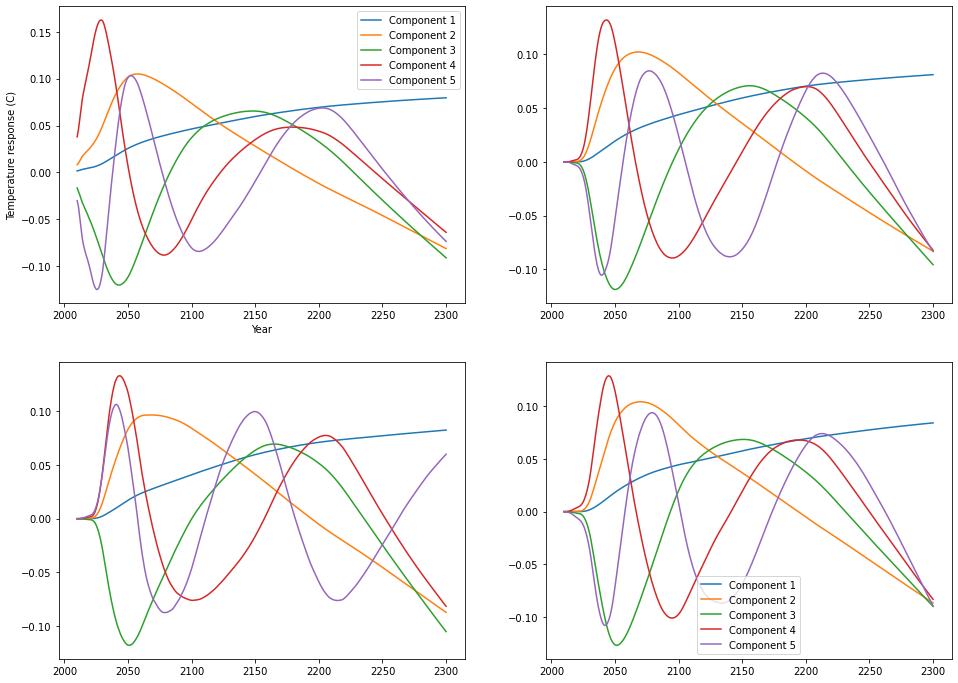

In [76]:
plt.figure(figsize=(16, 12))
leg_string = []
ax = plt.subplot(221)
for i in range(5):
    plt.plot(times, decomposers5["all"].components_[i])
    leg_string.append(f"Component {i+1}")
plt.xlabel("Year")
plt.ylabel("Temperature response (C)")
plt.legend(leg_string)
ax = plt.subplot(222)
for i in range(5):
    plt.plot(times, decomposers5[10].components_[i])

ax = plt.subplot(223)
for i in range(5):
    plt.plot(times, decomposers5[50].components_[i])

ax = plt.subplot(224)
for i in range(5):
    plt.plot(times, decomposers5[90].components_[i])
plt.legend(leg_string)


Text(0.5, 1.0, 'Reconstructed 2 for 50% data')

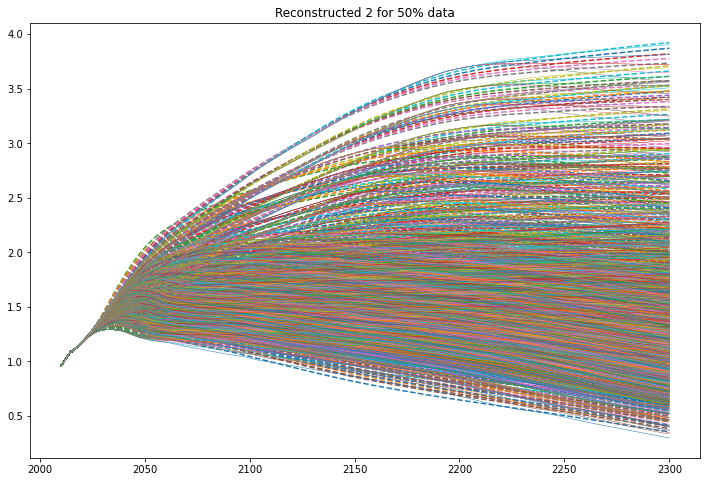

In [13]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
temp_temp = pd.DataFrame(reconstructed2[50], columns=times)
temp_temp.transpose().plot(ax=ax, legend=False, linestyle="--")
temps_50.transpose().plot(legend=False, ax=ax, linewidth=0.5)
plt.title("Reconstructed 2 for 50% data")

Text(0.5, 1.0, 'Reconstructed 2 for 50% data, half of data hidden for visibility')

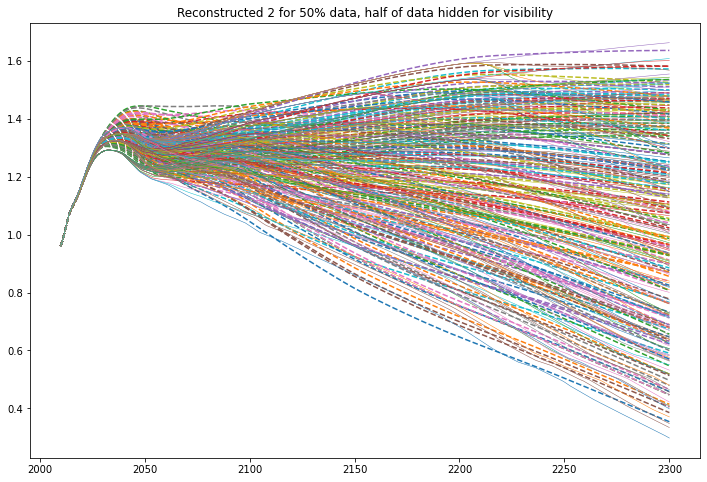

In [14]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
temp_temp = pd.DataFrame(reconstructed2[50], columns=times)
temp_temp.head(150).transpose().plot(ax=ax, legend=False, linestyle="--")
temps_50.head(150).transpose().plot(legend=False, ax=ax, linewidth=0.5)
plt.title("Reconstructed 2 for 50% data, half of data hidden for visibility")

In [15]:
# Accuracy at reconstructing only one quantile from results fitted to itself with only 2 or 3 components
(pd.DataFrame(reconstructed2[50], columns=times) - temp_data[50]).values.max()

0.18286670719139764

In [16]:
(pd.DataFrame(reconstructed3[50], columns=times) - temp_data[50]).values.max()

0.07694048203123405

In [17]:
(pd.DataFrame(reconstructed4[50], columns=times) - temp_data[50]).values.max()

0.04010754165993369

In [18]:
# However reconstructing all quantiles with results fitted to all quantiles is much less accurate with 3 components
(pd.DataFrame(reconstructed3["all"], columns=times).reset_index(drop=True) - temp_data["all"].reset_index(drop=True)).values.max()

0.15865527700045368

In [19]:
# Even 4 isn't that accurate
(pd.DataFrame(reconstructed4["all"], columns=times).reset_index(drop=True) - temp_data["all"].reset_index(drop=True)).values.max()

0.09744554119274929

<AxesSubplot:>

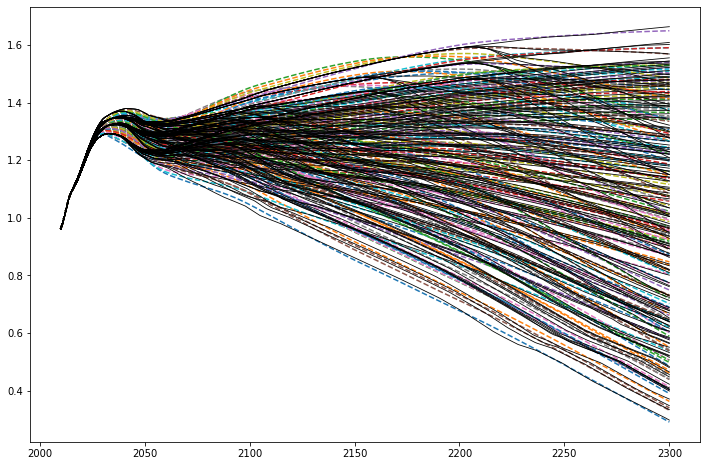

In [20]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
temp_temp = pd.DataFrame(reconstructed3[50], columns=times)
temp_temp.head(160).transpose().plot(ax=ax, legend=False, linestyle="--")
temps_50.head(160).transpose().plot(legend=False, ax=ax, linewidth=0.8, color="black")

Text(0.5, 1.0, 'Reconstructed 2 for all data')

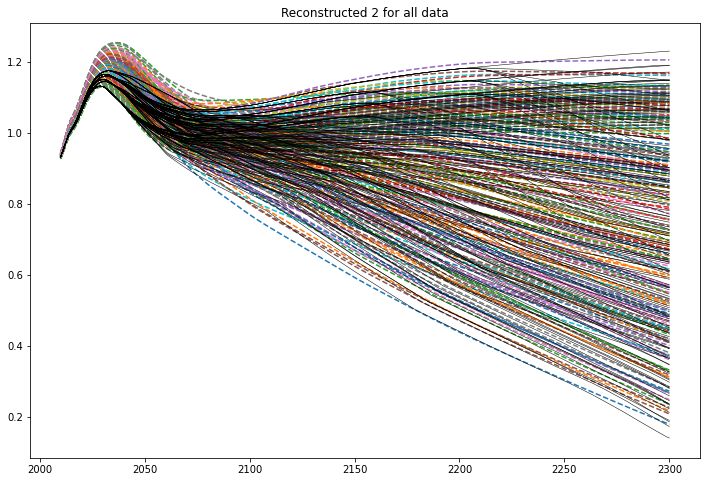

In [21]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
temp_temp = pd.DataFrame(reconstructed2["all"], columns=times)
temp_temp.head(180).transpose().plot(ax=ax, legend=False, linestyle="--")
temp_data["all"].head(180).transpose().plot(legend=False, ax=ax, linewidth=0.5, color="black")
plt.title("Reconstructed 2 for all data")

Text(0.5, 1.0, 'Reconstructed 3 for all data')

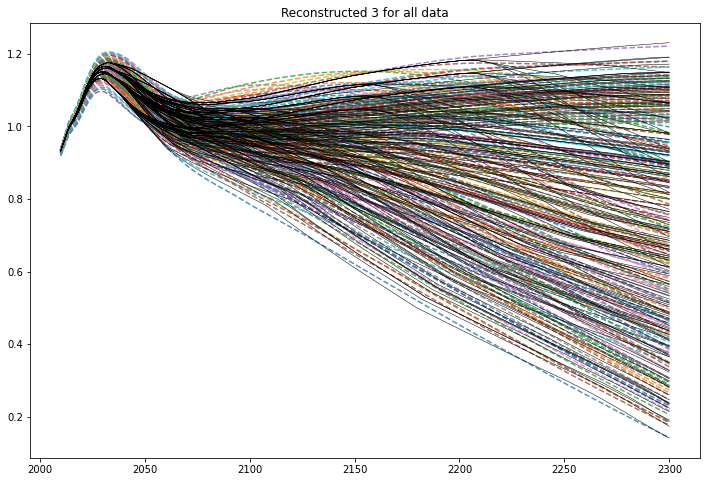

In [22]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
temp_temp = pd.DataFrame(reconstructed3["all"], columns=times)
temp_temp.head(180).transpose().plot(ax=ax, legend=False, linestyle="--", alpha=0.8)
temp_data["all"].head(180).transpose().plot(legend=False, ax=ax, linewidth=0.5, color="black")
plt.title("Reconstructed 3 for all data")

Text(0.5, 1.0, 'Reconstructed 4 for all data')

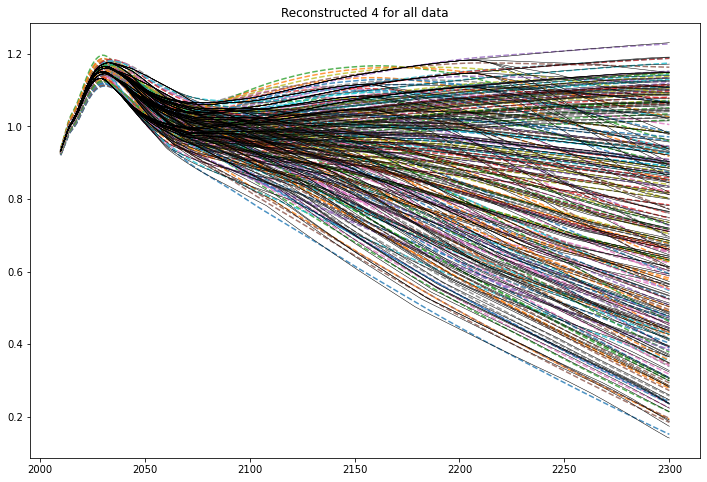

In [23]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
temp_temp = pd.DataFrame(reconstructed4["all"], columns=times)
temp_temp.head(180).transpose().plot(ax=ax, legend=False, linestyle="--", alpha=0.8)
temp_data["all"].head(180).transpose().plot(legend=False, ax=ax, linewidth=0.5, color="black")
plt.title("Reconstructed 4 for all data")

Text(0.5, 1.0, 'Reconstructed 4 for 50th percentile')

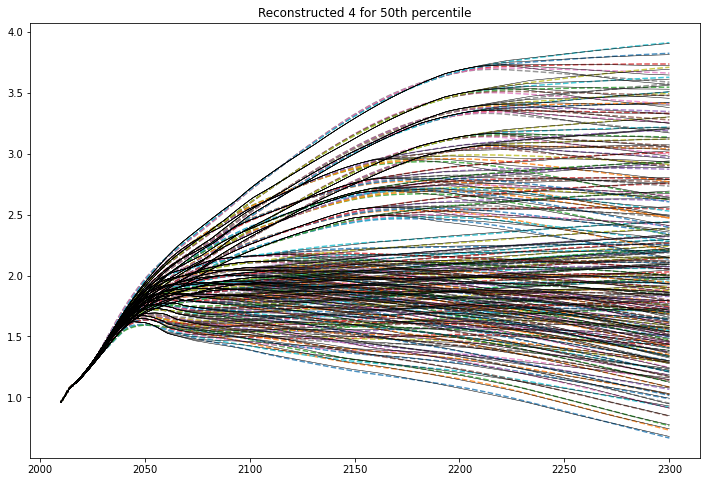

In [24]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
temp_temp = pd.DataFrame(reconstructed4[50], columns=times)
temp_temp.tail(180).transpose().plot(ax=ax, legend=False, linestyle="--", alpha=0.8)
temp_data[50].tail(180).transpose().plot(legend=False, ax=ax, linewidth=0.5, color="black")
plt.title("Reconstructed 4 for 50th percentile")

Text(0.5, 1.0, 'Reconstructed 5 for 50th percentile')

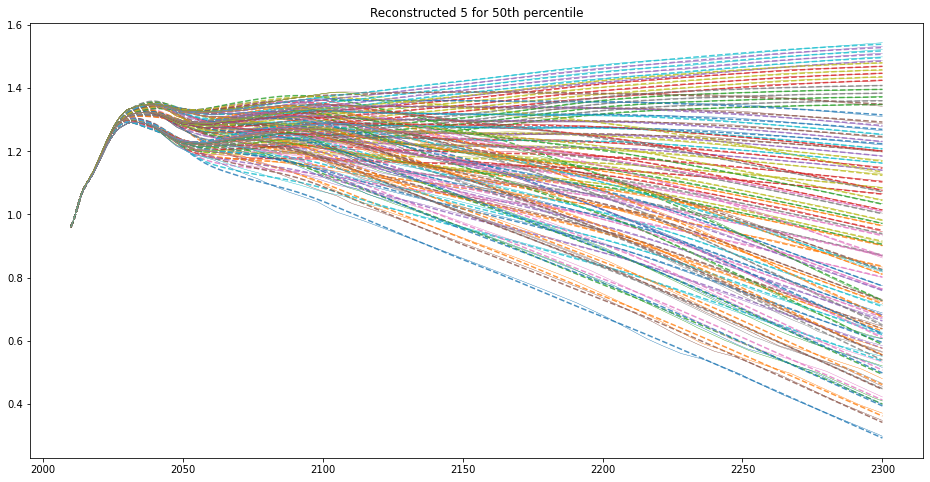

In [70]:
plt.figure(figsize=(16, 8))
ax = plt.subplot(111)
temp_temp = pd.DataFrame(reconstructed5[50], columns=times)
temp_temp.head(100).transpose().plot(ax=ax, legend=False, linestyle="--", alpha=0.8)
temp_data[50].head(100).transpose().plot(legend=False, ax=ax, linewidth=0.4)
plt.title("Reconstructed 5 for 50th percentile")

Text(0, 0.5, 'Temperature (C)')

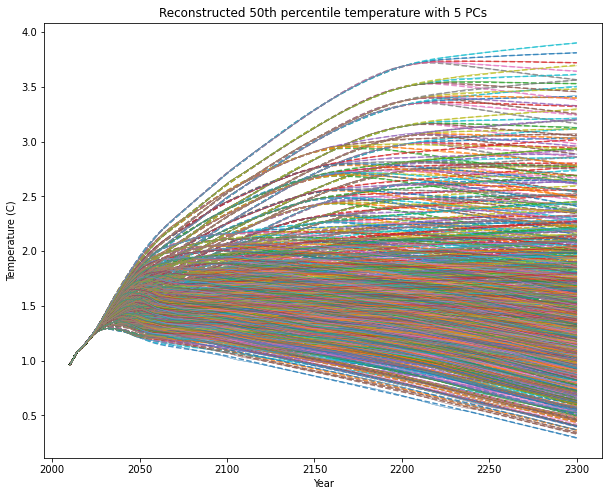

In [80]:
plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
temp_temp = pd.DataFrame(reconstructed5[50], columns=times)
temp_temp.transpose().plot(ax=ax, legend=False, linestyle="--", alpha=0.8)
temp_data[50].transpose().plot(legend=False, ax=ax, linewidth=0.4)
plt.title("Reconstructed 50th percentile temperature with 5 PCs")
plt.xlabel("Year")
plt.ylabel("Temperature (C)")

<AxesSubplot:>

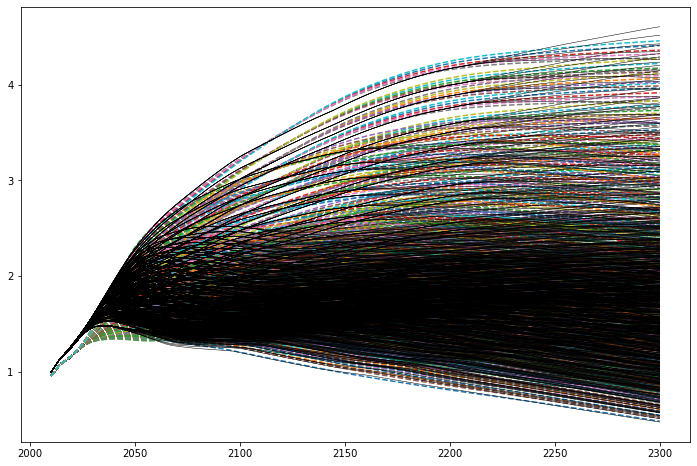

In [26]:
# Compare this to the effect of using the wrongly-calibrated PCA
temp90_from_50 = decomposers2[50].inverse_transform(decomposers2[50].transform(temp_data[90]))
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
temp_temp = pd.DataFrame(temp90_from_50, columns=times)
temp_temp.transpose().plot(ax=ax, legend=False, linestyle="--")
temp_data[90].transpose().plot(legend=False, ax=ax, linewidth=0.5, color="black")

In [27]:
# There is a distinct offset error at low times if using the miscalibrated data but otherwise the results work reasonably well. 

# Apply PCA to the FaIR timeseries directly

In [28]:
fair_df = fair_df.set_index("scenario")

In [29]:
to_fit_fair = fair_df.loc[:, [str(x) for x in times]]
to_fit_fair.columns = [int(x) for x in to_fit_fair.columns]

In [30]:
fair_pca4 = sklearn.decomposition.PCA(4).fit(to_fit_fair)
fair_pca5 = sklearn.decomposition.PCA(5).fit(to_fit_fair)
fair_pca6 = sklearn.decomposition.PCA(6).fit(to_fit_fair)
freconstructed4 = fair_pca4.inverse_transform(fair_pca4.transform(to_fit_fair))
freconstructed4 = pd.DataFrame(freconstructed4, columns=times).set_index(to_fit_fair.index)
freconstructed5 = fair_pca5.inverse_transform(fair_pca5.transform(to_fit_fair))
freconstructed5 = pd.DataFrame(freconstructed5, columns=times).set_index(to_fit_fair.index)
freconstructed6 = fair_pca6.inverse_transform(fair_pca6.transform(to_fit_fair))
freconstructed6 = pd.DataFrame(freconstructed6, columns=times).set_index(to_fit_fair.index)

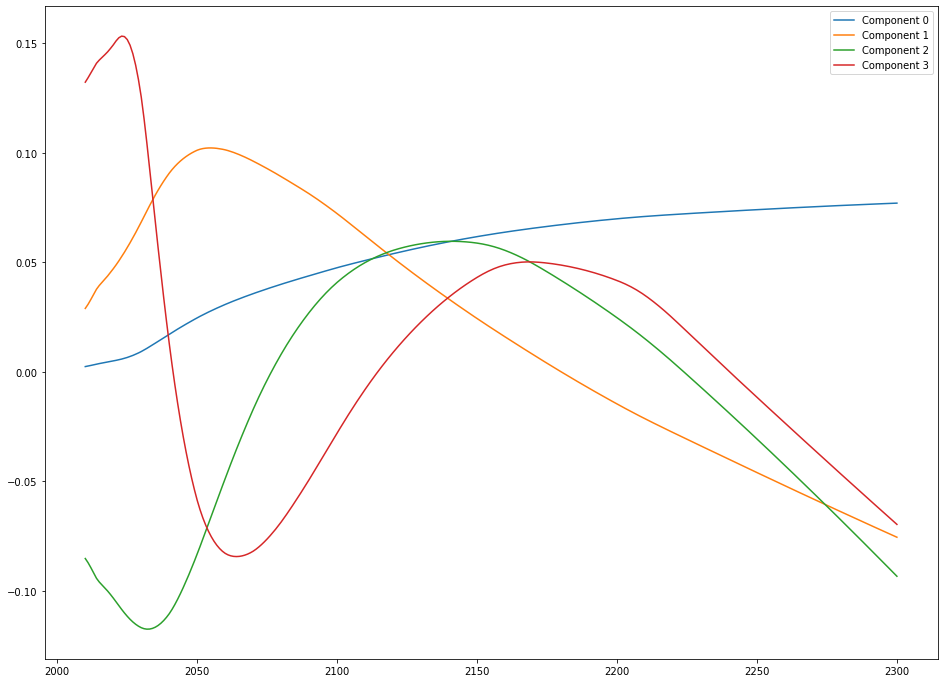

In [31]:
plt.figure(figsize=(16, 12))
leg_string = []
ax = plt.subplot(111)
for i in range(4):
    plt.plot(times, fair_pca4.components_[i])
    leg_string.append(f"Component {i}")
plt.legend(leg_string)

In [32]:
to_fit_t = to_fit_fair.transpose()

Text(0.5, 1.0, 'Reconstructed 4 for all data')

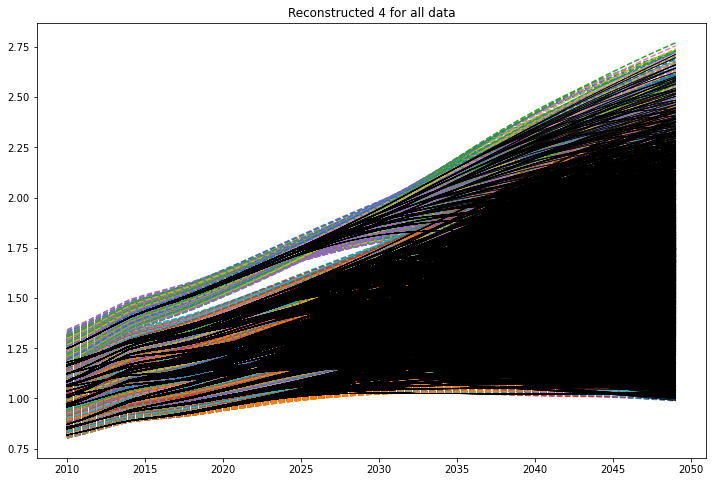

In [33]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
freconstructed4.transpose().head(40).plot(ax=ax, legend=False, linestyle="--")
to_fit_fair.transpose().head(40).plot(legend=False, ax=ax, linewidth=0.5, color="black", alpha=0.6)
plt.title("Reconstructed 4 for all data")

Text(0.5, 1.0, 'Reconstructed 5 for all data')

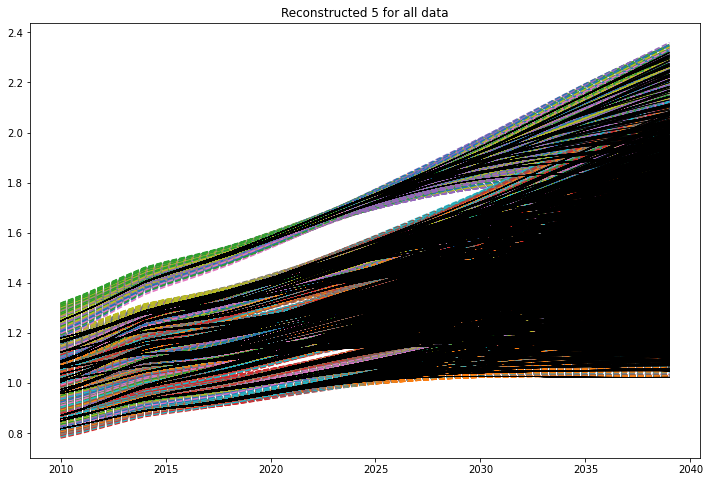

In [34]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
freconstructed5.transpose().head(30).plot(ax=ax, legend=False, linestyle="--")
to_fit_t.head(30).plot(legend=False, ax=ax, linewidth=0.5, color="black", alpha=0.8)
plt.title("Reconstructed 5 for all data")

Text(0.5, 1.0, 'Reconstructed 6 for all data')

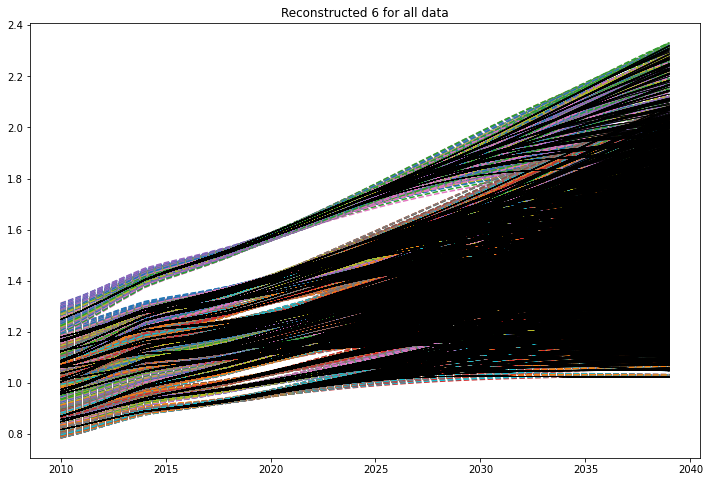

In [35]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
freconstructed6.transpose().head(30).plot(ax=ax, legend=False, linestyle="--")
to_fit_t.head(30).plot(legend=False, ax=ax, linewidth=0.5, color="black", alpha=0.8)
plt.title("Reconstructed 6 for all data")

In [36]:
# Accuracy is not that good with even 4-6 parameters
(freconstructed4 - to_fit_fair).values.max()

0.13729368912085071

In [37]:
(freconstructed5 - to_fit_fair).values.max()

0.09466715877802778

In [38]:
(freconstructed6 - to_fit_fair).values.max()

0.06597226180533022

# Reconstructing emissions from temperature space

In [39]:
temps_py_desc = temps_py.data

In [40]:
def decode_scen(df):
    df["factor2030"] = [float(x[1][:4]) for x in df["scenario"].str.split("2030fact")]
    df["nzdate"] = [int(x[1][:4]) for x in df["scenario"].str.split("_nz")]
    df["overshoot"] = [float(x[3][2:]) for x in df["scenario"].str.split("_")]
    df["methane"] = [float(x[4][4:]) for x in df["scenario"].str.split("_")]
    return df
temps_py_desc = decode_scen(temps_py_desc)

In [41]:
temps_py_desc

model                                    scenario region  \
0        NameVanished  scen_2030fact0.12_nz2040_ov-10000_meth0.25  World   
1        NameVanished  scen_2030fact0.12_nz2040_ov-10000_meth0.25  World   
2        NameVanished  scen_2030fact0.12_nz2040_ov-10000_meth0.25  World   
3        NameVanished  scen_2030fact0.12_nz2040_ov-10000_meth0.25  World   
4        NameVanished  scen_2030fact0.12_nz2040_ov-10000_meth0.25  World   
...               ...                                         ...    ...   
1309495  NameVanished       scen_2030fact1.32_nz2200_ov0_meth0.75  World   
1309496  NameVanished       scen_2030fact1.32_nz2200_ov0_meth0.75  World   
1309497  NameVanished       scen_2030fact1.32_nz2200_ov0_meth0.75  World   
1309498  NameVanished       scen_2030fact1.32_nz2200_ov0_meth0.75  World   
1309499  NameVanished       scen_2030fact1.32_nz2200_ov0_meth0.75  World   

                    variable unit  year climate_model  quantile     value  \
0        Surface Temperature    K  2010    FaIRv1.6.4      0.10  0.932584   
1        Surface Temperature    K  2010    FaIRv1.6.4      0.33  0.949845   
2        Surface Temperature    K  2010    FaIRv1.6.4      0.50  0.960186   
3        Surface Temperature    K  2010    FaIRv1.6.4      0.66  0.971336   
4        Surface Temperature    K  2010    FaIRv1.6.4      0.90  0.996931   
...                      ...  ...   ...           ...       ...       ...   
1309495  Surface Temperature    K  2300    FaIRv1.6.4      0.10  2.890492   
1309496  Surface Temperature    K  2300    FaIRv1.6.4      0.33  3.609135   
1309497  Surface Temperature    K  2300    FaIRv1.6.4      0.50  3.904282   
1309498  Surface Temperature    K  2300    FaIRv1.6.4      0.66  4.085395   
1309499  Surface Temperature    K  2300    FaIRv1.6.4      0.90  4.606075   

         factor2030  nzdate  overshoot  methane  
0              0.12    2040   -10000.0     0.25  
1              0.12    2040   -10000.0     0.25  
2              0.12    2040   -10000.0     0.25  
3              0.12    2040   -10000.0     0.25  
4              0.12    2040   -10000.0     0.25  
...             ...     ...        ...      ...  
1309495        1.32    2200        0.0     0.75  
1309496        1.32    2200        0.0     0.75  
1309497        1.32    2200        0.0     0.75  
1309498        1.32    2200        0.0     0.75  
1309499        1.32    2200        0.0     0.75  

[1309500 rows x 13 columns]

In [42]:
pca3_50pc = decode_scen(
    pd.DataFrame(decomposers3[50].transform(temp_data[50]), columns=["PCA1", "PCA2", "PCA3"]).set_index(
        pyam.IamDataFrame(temps).filter(quantile=0.5).timeseries().index.get_level_values("scenario")
    ).reset_index()
)
pca3_50pc

scenario       PCA1      PCA2  \
0    scen_2030fact0.12_nz2040_ov-10000_meth0.25 -13.843399 -0.034079   
1     scen_2030fact0.12_nz2040_ov-10000_meth0.5 -12.837960  0.229001   
2    scen_2030fact0.12_nz2040_ov-10000_meth0.75 -12.300221  0.363477   
3     scen_2030fact0.12_nz2040_ov-2500_meth0.25  -7.032393 -1.848668   
4      scen_2030fact0.12_nz2040_ov-2500_meth0.5  -6.015939 -1.625470   
..                                          ...        ...       ...   
895    scen_2030fact1.32_nz2200_ov-7500_meth0.5  24.999999 -0.159815   
896   scen_2030fact1.32_nz2200_ov-7500_meth0.75  27.522811 -0.094388   
897       scen_2030fact1.32_nz2200_ov0_meth0.25  24.147052 -0.965915   
898        scen_2030fact1.32_nz2200_ov0_meth0.5  25.898877 -0.865239   
899       scen_2030fact1.32_nz2200_ov0_meth0.75  28.484462 -0.849875   

         PCA3  factor2030  nzdate  overshoot  methane  
0    0.598960        0.12    2040   -10000.0     0.25  
1    0.488794        0.12    2040   -10000.0     0.50  
2    0.418568        0.12    2040   -10000.0     0.75  
3    0.164108        0.12    2040    -2500.0     0.25  
4    0.008687        0.12    2040    -2500.0     0.50  
..        ...         ...     ...        ...      ...  
895  0.561330        1.32    2200    -7500.0     0.50  
896  0.684177        1.32    2200    -7500.0     0.75  
897 -0.063511        1.32    2200        0.0     0.25  
898 -0.086965        1.32    2200        0.0     0.50  
899 -0.010809        1.32    2200        0.0     0.75  

[900 rows x 8 columns]

In [43]:
import seaborn

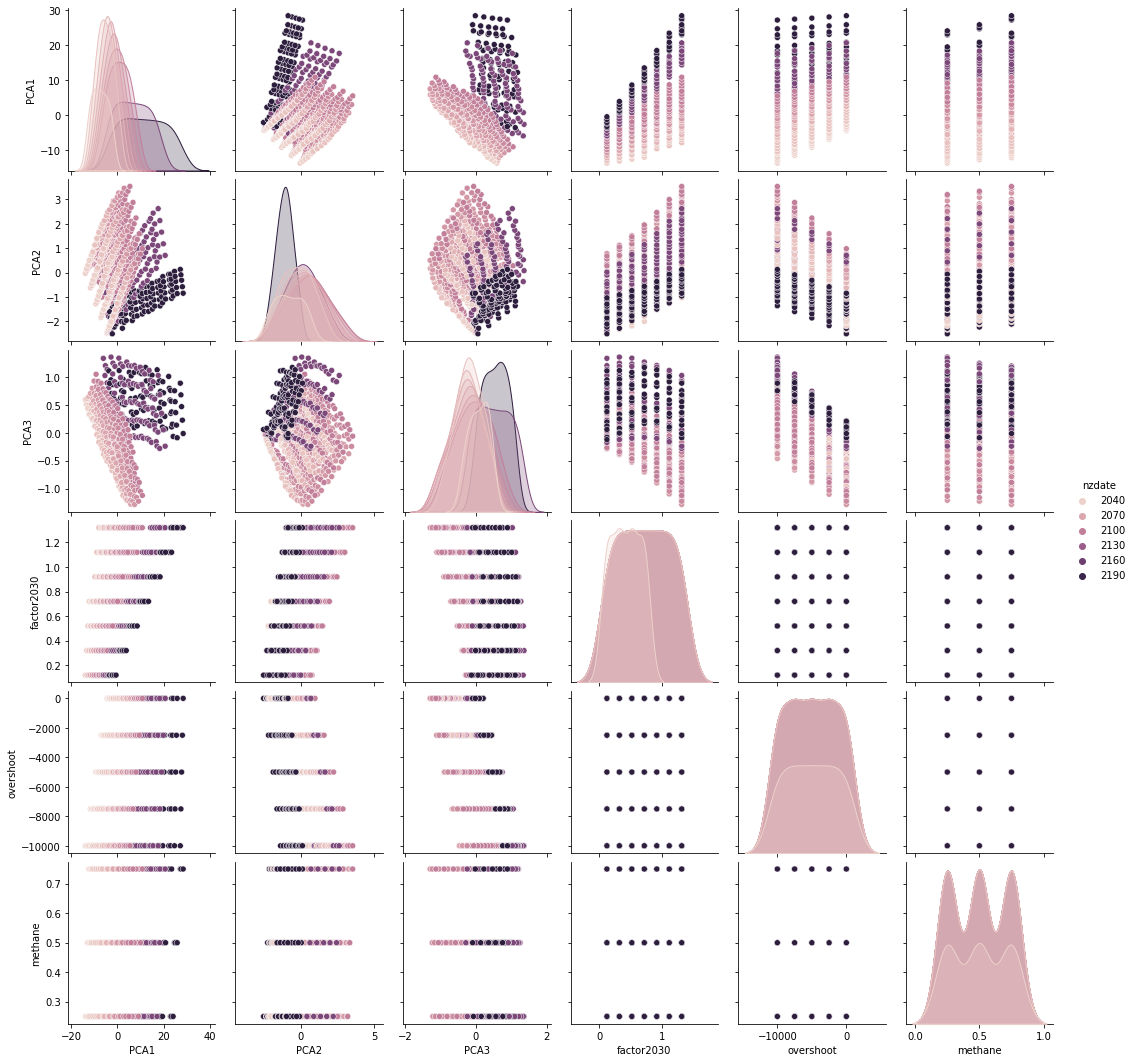

In [44]:
seaborn.pairplot(pca3_50pc, hue="nzdate")

## First see if there is a direct relationship with temperature and emissions parameters

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [46]:
functional_cols = ["year", "factor2030", "nzdate", "overshoot", "methane"]
poly = PolynomialFeatures(degree=3)
poly_variables = poly.fit_transform(temps_py_desc.loc[:, functional_cols])
results = temps_py_desc.loc[:, "value"] 

In [47]:
poly_var_train, poly_var_test, res_train, res_test = train_test_split(
    poly_variables, results, test_size = 0.2, random_state = 4
)

In [48]:
regression = linear_model.LinearRegression()
poly_model = regression.fit(poly_var_train, res_train)
score = poly_model.score(poly_var_test, res_test)
score
# Unimpressive score for all values of degree

0.8014987290322196

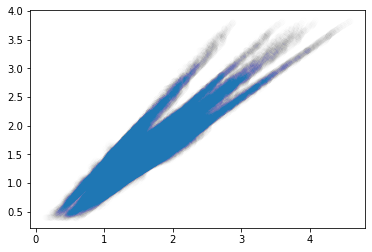

In [49]:
plt.scatter(res_test, poly_model.predict(poly_var_test), alpha=0.005)

## Now see if there is a better result using the PCA version of temps
Experiments indicate that the 3rd PCA is very hard to fit and requires a polynomial of degree 4 and small test data to even be positive in expectation. 

In [50]:
# The numerical stability of calculations is higher when variables are all of order 1
pca3_50pc["nzreduced"] = pca3_50pc["nzdate"] / 1000
pca3_50pc["overshootreduced"] = pca3_50pc["overshoot"]/1000

In [51]:
poly3 = PolynomialFeatures(degree=3)
pca_functional_cols = ["factor2030", "nzreduced", "overshootreduced", "methane"]
store_pca_var3 = {}
# Derive relationship between each PC and the polynomial of the emissions variables
for comp in ["PCA1", "PCA2", "PCA3"]:
    poly_variables = poly3.fit_transform(pca3_50pc.loc[:, pca_functional_cols])
    results = pca3_50pc.loc[:, comp]
    regression = linear_model.LinearRegression()
    poly_var_train, poly_var_test, res_train, res_test = train_test_split(
        poly_variables, results, test_size = 0.15, random_state = 4
    )
    poly_model = regression.fit(poly_var_train, res_train)
    score = poly_model.score(poly_var_test, res_test)
    print(score)
    store_pca_var3[comp] = poly_model

0.9998156102983833
0.9989772998104123
0.9876557731549997


In [52]:
poly4 = PolynomialFeatures(degree=4)
store_pca_var4 = {}
PCAs = ["PCA1", "PCA2", "PCA3"]
for comp in PCAs:
    poly_variables = poly4.fit_transform(pca3_50pc.loc[:, pca_functional_cols])
    results = pca3_50pc.loc[:, comp]
    regression = linear_model.LinearRegression()
    poly_var_train, poly_var_test, res_train, res_test = train_test_split(
        poly_variables, results, test_size = 0.15, random_state = 4
    )
    poly_model = regression.fit(poly_var_train, res_train)
    score = poly_model.score(poly_var_test, res_test)
    print(score)
    store_pca_var4[comp] = poly_model

0.9998913791307091
0.9994623143508442
0.9960878406896295


In [53]:
poly5 = PolynomialFeatures(degree=5)
store_pca_var5 = {}
PCAs = ["PCA1", "PCA2", "PCA3"]
for comp in PCAs:
    poly_variables = poly5.fit_transform(pca3_50pc.loc[:, pca_functional_cols])
    results = pca3_50pc.loc[:, comp]
    regression = linear_model.LinearRegression()
    poly_var_train, poly_var_test, res_train, res_test = train_test_split(
        poly_variables, results, test_size = 0.15, random_state = 4
    )
    poly_model = regression.fit(poly_var_train, res_train)
    score = poly_model.score(poly_var_test, res_test)
    print(score)
    store_pca_var5[comp] = poly_model

0.9999501808967636
0.999661014104722
0.9982865537480061


Quality of polynomial matching the original is sufficient when we use a 5th order polynomial. 

In [54]:
def pca_fun_meth_sep(vec, answer, meth):
    # Function that establishes how far away the polynomial extension of the emissions parameters are from giving the 
    # PCA values 1-3, with methane level prescribed.
    return np.array([
        store_pca_var5["PCA1"].predict(poly5.fit_transform(np.hstack([vec, meth]).reshape(1, 4))) - answer[0],
        store_pca_var5["PCA2"].predict(poly5.fit_transform(np.hstack([vec, meth]).reshape(1, 4))) - answer[1],
        store_pca_var5["PCA3"].predict(poly5.fit_transform(np.hstack([vec, meth]).reshape(1, 4))) - answer[2],
    ]).squeeze()

In [55]:
def pca_fun(vec, answer):
    # Function that establishes how far away the polynomial extension of the emissions parameters are from giving the 
    # PCA values 1-3.
    return np.array([
        store_pca_var5["PCA1"].predict(poly5.fit_transform(vec.reshape(1, 4))) - answer[0],
        store_pca_var5["PCA2"].predict(poly5.fit_transform(vec.reshape(1, 4))) - answer[1],
        store_pca_var5["PCA3"].predict(poly5.fit_transform(vec.reshape(1, 4))) - answer[2],
    ]).squeeze()

In [56]:
# check that the function returns the approximate answer when given a true parallel. This gives an upper bound on the 
# allowable error in root finding. 
pca_fun(
    pca3_50pc.loc[0, ["factor2030", "nzreduced", "overshootreduced", "methane"]].values,
    pca3_50pc.loc[0, PCAs],
)

array([0.09814074, 0.01181523, 0.01420027])

In [57]:
pca3_50pc.loc[0, PCAs]

PCA1   -13.843399
PCA2    -0.034079
PCA3      0.59896
Name: 0, dtype: object

In [58]:
decomposers3[50].transform(temp_data[50].loc[0:0])

array([[-13.8433986 ,  -0.0340789 ,   0.59896046]])

In [59]:
meth=0.25
meth_sep_soln = fsolve(
    pca_fun_meth_sep, np.array([1.5, 2.050, -5.000]), 
    args=(decomposers3[50].transform(temp_data[50].loc[0:0]).squeeze(), meth)
)
meth_sep_soln
# Although the solution is found, it involves a bad date (too early). 

array([ 0.25183971,  1.98269818, -4.99961778])

In [60]:
root_soln = root(
    pca_fun_meth_sep, 
    x0=np.array([1.5, 2.039, -1.000]), 
    args=(pca3_50pc.loc[0:0, PCAs].values.squeeze(), meth),   
)
print("methane: {}".format(meth))
print(root_soln)
# Again it finds an invalid solution

methane: 0.25
    fjac: array([[ 0.33504713, -0.75935677,  0.55778195],
       [ 0.89675806,  0.4386382 ,  0.05849359],
       [ 0.28908198, -0.48059735, -0.82792378]])
     fun: array([-6852.53323743,   302.57090534, -2536.24210723])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 25
     qtf: array([-3940.35096145, -6160.69920484,   -26.54349862])
       r: array([ 8.75116451e+11, -5.77795905e+13,  4.66890833e+12,  2.22075837e+10,
        1.35439178e+10,  4.17641221e+00])
  status: 5
 success: False
       x: array([ 2.30969326,  2.0498282 , -1.01775494])


In [61]:
"""
root_soln = root(
    pca_fun, 
    x0=np.array([1.5, 2.039, -1.000, 0.5]), 
    args=(pca3_50pc.loc[0:0, PCAs].values.squeeze(),),
    method='lm'
)
"""

"\nroot_soln = root(\n    pca_fun, \n    x0=np.array([1.5, 2.039, -1.000, 0.5]), \n    args=(pca3_50pc.loc[0:0, PCAs].values.squeeze(),),\n    method='lm'\n)\n"

In [62]:
# Using least squares optimisation we can impose a condition requiring that the answer is within certain bounds
sq_soln = least_squares(
    pca_fun,
    x0=np.array([1.5, 2.039, -1.000, 0.5]), 
    bounds=([0, 2.031, -20, 0.1], [10, 2.300, 0, 0.9]),
    args=(pca3_50pc.loc[0:0, PCAs].values.squeeze(), ),
    #xtol=3e-16,
    #diff_step=1e-9
)
print("methane: {}".format(meth))
print(sq_soln)

methane: 0.25
 active_mask: array([0, 0, 0, 0])
        cost: 1.787088447860578
         fun: array([ 0.65580461,  0.29504003, -1.74844176])
        grad: array([  1.093054  ,  16.82501295,  -8.09836888, -10.1340788 ])
         jac: array([[ 2.00000000e+00,  3.82815416e+01,  3.06923654e+03,
        -6.13826250e+04],
       [ 0.00000000e+00, -8.92415360e-01, -1.36387182e+02,
         3.08525000e+04],
       [ 1.25000000e-01,  4.58516857e+00,  1.13282478e+03,
        -1.78113750e+04]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 40
        njev: 37
  optimality: 40.49564980298498
      status: 3
     success: True
           x: array([ 9.15244366e-05,  2.03100493e+00, -5.00046990e+00,  5.00043511e-01])


In [63]:
# Check the solutions actually work - several currently don't. 
print(pca_fun(sq_soln.x, decomposers3[50].transform(temp_data[50].iloc[0:1]).squeeze()))
print(pca_fun_meth_sep(meth_sep_soln, decomposers3[50].transform(temp_data[50].iloc[0:1]).squeeze(), meth))
print(pca_fun_meth_sep(root_soln.x, decomposers3[50].transform(temp_data[50].iloc[0:1]).squeeze(), meth))
# The final option is not a valid solution

[ 0.65580461  0.29504003 -1.74844176]
[-6.94462170e-07  6.40636037e-07  1.11171757e-07]
[-6852.53323743   302.57090534 -2536.24210723]


In [64]:
# Check if we can find other roots via different starting points

sq_solns = []
start_points = [
    np.array([0.11, 2.035, -10.000]), np.array([0.5, 2.035, -10.000]), np.array([0.8, 2.035, -10.000]), 
    np.array([0.11, 2.05, -10.000]), np.array([0.5, 2.05, -10.000]), np.array([0.8, 2.05, -10.000]), 
    np.array([0.11, 2.05, -1.000]), np.array([0.5, 2.05, -1.000]), np.array([0.8, 2.05, -1.000]), 
]
for meth in [0.25, 0.5, 0.75]:
    print("methane: {}".format(meth))
    for x0 in start_points:
        sq_soln = least_squares(
            pca_fun_meth_sep, 
            x0=x0, 
            bounds=([0, 2.031, -20], [10, 2.300, 0]),
            args=(pca3_50pc.loc[0:0, PCAs].values.squeeze(), meth),
            xtol=3e-16,
            diff_step=1e-9
        )
        if (sq_soln.success):
            print(sq_soln.x)
            sq_solns.append(sq_soln.x)
        else: 
            print("Fail")

methane: 0.25
[  0.10917749   2.03952966 -10.00000232]
[  0.4968431    2.03416479 -10.00001578]
[  0.69123479   2.03100008 -10.00000863]
[  0.10970887   2.03952735 -10.00000237]
[  0.49291644   2.04449399 -10.00007431]
[  0.79482452   2.03136018 -10.00001784]
[ 1.85544896  2.03100041 -5.00154721]
[ 0.59194764  2.03168301 -5.00133002]
[ 1.99663553  2.03106428 -5.00153483]
methane: 0.5
[  0.05693103   2.03109292 -10.00000445]
[  0.52168493   2.03390142 -10.00005811]
[  0.77484893   2.03324551 -10.0000747 ]
[  0.14920195   2.03868118 -10.00004221]
[  0.31069991   2.03252369 -10.00003231]
[  0.73976349   2.03962051 -10.00012163]
[ 0.26281054  2.06119441 -5.00202851]
[ 1.97130652  2.03116812 -5.00214167]
[ 2.01414492  2.03203672 -5.00225946]
methane: 0.75
[  0.14090514   2.03197862 -10.00003855]
[  0.32916252   2.03204583 -10.00005444]
[  0.86212965   2.03337858 -10.00010748]
[  0.32272225   2.04364168 -10.00011223]
[  0.52853896   2.0318585  -10.00006872]
[  0.60209243   2.03127417 -10.000

In [65]:
# cf actual answer 
pca3_50pc.loc[0:0]

scenario       PCA1      PCA2     PCA3  \
0  scen_2030fact0.12_nz2040_ov-10000_meth0.25 -13.843399 -0.034079  0.59896   

   factor2030  nzdate  overshoot  methane  nzreduced  overshootreduced  
0        0.12    2040   -10000.0     0.25       2.04             -10.0

In [66]:
# I'm suspicious that some of these shouldn't work
sq_soln = least_squares(
            pca_fun_meth_sep, 
            x0=np.array([0.8, 2.05, -1.000]), 
            bounds=([0, 2.031, -20], [10, 2.300, 0]),
            args=(pca3_50pc.loc[0:0, PCAs].values.squeeze(), 0.25),
            xtol=3e-16,
            diff_step=1e-9
        )
sq_soln
# This has a later nz and a lower overshoot than the true solution. Something is going wrong. 

 active_mask: array([0, 0, 0])
        cost: 3.021011565960713
         fun: array([ 0.66719138, -1.31693318, -1.96534114])
        grad: array([  9.30743756, 244.68815858,  -0.71089808])
         jac: array([[ 7.46313537e+00,  3.91592485e+02,  3.06795217e+03],
       [-7.46313537e+00,  9.81273908e+01, -1.35000323e+02],
       [ 2.79867576e+00, -5.73174011e+01,  1.13232685e+03]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 26
        njev: 17
  optimality: 18.583560556441853
      status: 2
     success: True
           x: array([ 1.99663553,  2.03106428, -5.00153483])